In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"D:\Data_Sets\fuel.csv")

In [3]:
X = df.copy()
y = X.pop('FE')

In [4]:
preprocessor = make_column_transformer(
    (StandardScaler(),
    make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
    make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y)

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


C:\Users\manda\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
df.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [6]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [9]:
history = model.fit(
    X,y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 1s 6ms/step - loss: 3.1496
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.5284
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7480
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4034
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.2656
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2047
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1645
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1348
Epoch 9/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1112
Epoch 10/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0936
Epoch 11/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0832
Epoch 12/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0754
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

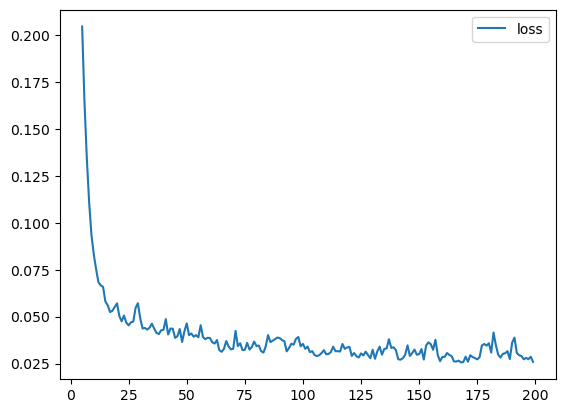

In [10]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();